# Fishing Recognition

### Approaches

##### Monitor fishing activities from space to detect abnormal use of fishing gear [1]. 
Method:
    1) Train Gaussian Mixture Model for regimes from series of the speed and turning angle computed from the VMS data
    2) Apply fitted gear-specific GMMs to extract associated regime related features. (Time spent, mean duration, etc.)
    3) Combine with other features; (mean position and sinuosity index) with a suupervised classification framework. - RF and SVM with recoginition rates ~94.59%
Notes:
- The characteristics of each activity can be expected to vary from one fishing gear type to another.

Data:
- VMS data, computed speed and turning angle series using first-order finite differences.
- Filtered VMS Data:
    -Preprocessing
    - duplicate data
    - acquisition time steps below 120 seconds between two sucessive locations along VMS trajectory
    - data associated with a speed five times greater than the trajortory speed (spike)
    - low speed segment (<= 0.5 knots) for a time interval greater than six hours. Remove port, break down, etc.

Algs:
1. Characterize the movement patterns for each fishing gear, unsupervised scheme. Guassian Mixture Models (GMM). Model the join distribution of the speed and the turning angle as a GMM (weighted sum of M Gaussian densities)
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture4.PNG?raw=true)
where x is a 2-dimensional continuous-valued data vector (speed and turning angle). $W_i$ where $i=1,...,M$ are the mixture of weights. $g(x|\mu _i,\sum _i)$ , $i=1,...,M$ are Gaussian densities. Each density is a bivariate Gaussian function of the form
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture5.PNG?raw=true)

with mean vector $\mu _i$ and covariance matrix $\sum _i$. The mixture weights satisfy the constraint that $\sum ^M _(i=1) w _i = 1$. Overall the parameters of the GMM are stored in $\lambda = {w _i , \mu _i , \sum _i }, i = 1,...,M$. 

This is fit to the join distribution of speed and the turning angle. The maximum likelihood inference of GMM parameters $\lambda$ using iterative expectation-maimization (EM) algorithm. ${x _k}$ is the dataset of speed and turning angle feature vectors, and $Z _k$ the latent variable, which states the component the kth data is associated with. 

EM Algorithm:
Expectation Step: (evaluates the posterior likelihood of the latent variable)
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture6.PNG?raw=true)

Maximization Step, updates the model parameter $\lambda$ given the posterior likelihoods;
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture7.PNG?raw=true)

##### Automatic Recognition of the Fishing Gear
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture8.PNG?raw=true)
1. Unsupervised GMM-based analysis of VMS data
2. Feature Extraction of Vectors: Global characterization of any trajectory. For a given vessel, specific VMS datasets. Time spent in each regieme, also calcualte the mean duration of each regime period from the regimes identified.
3. Supervised learning of a recognition model. After feature extraction, perform classification. Generated features below. 
![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture9.PNG?raw=true)

Used RF and SVM, with 20 fold cross-validation procedure (found results were the same). 

#### Fishing Pattern dection with AIS and ML [2].
Three methods, one for each vessel type:
1) Trawlers [84% Accuracy]: Hidden Markov Model using vessel speed as observation variable
-Drag nets behind vessel either sea floor (bottom trawling) or water column (pelagic or midwater trawling)
- Length: Minutes - Hours, usually 3-5 hours. Speed: 2.5-5.5 knots
2) LongLiners [83% Accuracy]: Data Mining apporach using algorithm inspired from studies on animal movement.
- Fishing lines up to 100 km in length.
- Lines deployed at various depths, use a speed slightly slower than steaming speed. Then the vessel drifts or sets more lines elsewhere.  Est Time. ~6 hours. Classification used for identification of longline setes comprise spatial-temporal movement patters in a very restricted area. 
3) Purse Senier [97% Accuracy]: Multi-layered filtering strategy based on vessel speed and operation time.
- Long nets deployed hanging vertically from floats around schooling fish near the surface. Done at high speeds ~10 knots. Drifting with the net attached, they collect the fish. Duration varys from 1 to serveral hours. 
    
    Data & Methods
1. For all points to imporve fishing activity prediction, calculated whether it occurred during the night or day. (used R package solaR)
2. Established a 10 km boundary around shorelines. Required calculated of the Haversine distance between each vessel track point and all the points in the shoreline data (see dataset for this @ Natural Earth in the paper) used code found here for parallel speed up. http://stackoverflow.com/questions/27697504/ocean-latitude-longitude-point-distance-from-shore
    
#### Mapping EU fishing activities using ship tracking data (Trawlers Only)[3]

1. Data Cleaning: Position and speed data cleaned for errors. Data decimated to an inteval of 5 minutes between observations. 
2. Fishing Behaviour Identification: the points corresponding to fishing behaviour (see Algorithm 1) are extracted based on the assumption that there is a separation of fishing activities with a steaming speed that is relatively high with respect to fishing speed. The resulting speed profiles, after excluding the zero-velocity points that relate to messages sent when the vessel is likely to be in a port, show a bi-modal distribution.

![Trawler Speed Profile](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture.PNG?raw=true)

Depending on vessel size, area, fishing gear and many other factors, fishing vessels exhibit specific mean and standard deviation values of the speed bi-modal distributions. For this reason, the identification of fishing behaviour has to be implemented for each individual vessel (Natale et al., 2015). Using a Gaussian Mixture Model (GMM), an unsupervised classification method, we isolated the two main activities distributions and obtained the component parameters. Fishing speed confidence intervals were built for each vessel using the first component mean and standard deviation.

![Trawler Speed Profile](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture2.PNG?raw=true)

4. Accuracy and validation 
The aggregated fishing intensity value for a specific cell is subject to the completeness of information that can be collected in that area. In our case, since the reception of AIS is related to the radio propagation of the messages transmitted by the vessel, such completeness is mainly linked to the distance to the closest AIS receiving station. Nevertheless, the propagation of AIS messages is also influenced by the atmospheric conditions in the area and significantly varies accordingly.  

#### Mapping Fishing Effor Through AIS Data[4].

Data and Methods:

1. Computed the trajectories from AIS observations. Ratio between AIS position and the trajectory interpolated points was used to estimate the AIS spatial coverage capabilities

2. Methodology used for the identification of fishing activity is based on assuming a fishing behaviour highly dependent and characterised by speed. Detecting changes and frequency of speed will help identifying which part of the vessel track can be considered as fishing and which not. Among the different fishing behaviours, those vessels employing amobile gear are characterized by a clear speed fingerprint. Hence we willexpect better parameters estimates for trawlers

Data Cleaning:

1) Only messages with a speed greater than 0.5 knots (0.257 m/s). Usually a large portion of low speed messages are at the port. 
2) Some vessels do not systematically use the AIS, therefore these were dropped from the dataset.

3) A final cleaning filter consisted in omitting outliers and probable errors represented by messages whose speed was higher than the upper quartile plus 1.5 times the interquartile range. 

4) Data preparation process we investigated the distribution of every vessel speed profile by creating histograms of the speed. The speed histograms of most vessels showed a bimodal distribution, with the two modes corresponding to steaming (high speed) and fishing (lowspeed) behaviours.The bimodal distribution of speeds can be interpreted as the mixture of two Gaussian curves. 
    
![Speed Profile](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture3.PNG?raw=true)


5) Using expectation maximization (EM) alg, possible to estimate the two distributions' parameters and to assign the observations to a particular model component. Distribution of speed profiles for every vessel was analysed (R) using mixtools library and the fuction NormalmixEMcomp2 designed for Gaussian mixtures. For every vessel, a vector containing the parameters of the two Gaussian components: the fishing speed and the steaming speed distributions. For the purpose of the analysis we considered only the fishing speed distribution, i.e. the first mode,and its corresponding parameters. Speed confidence intervasl related to fishing activites for a specific vessel, they defined it as +/- 1.5 std. from the first mode. Note, this is just for the trawl fishing type. 

6) Performance of the algorithm changed between different gears and individualvessels. In particular the performance resulted higher for otter trawler, bottom andmid-water, pairtrawler, purse seiner and Danishseiner andlower in the case of gillnetter, long-linerand fishing pots. 

7) Vessels with fixed gear for examples, such aspots, have different speed profiles, characterized by the presence of messages with speed of values zero (messages that have been omitted in our model). Further improvements of themodel will include zero speed messages that are not located in the port and also considering non Gaussian mixture morel components. 

8) Regardless of the shape of the distributions it is natural to expect that fishing corresponds to the speed with the highest frequency in the speed profiles (first mode) considering that fishermen would tend over the long period to optimise the time spent at sea and the fuel consumption,concentrating great part of their time spent at sea in the fishing activity rather than at steaming. Starting from this consideration a direction which would merit more investigation in future research is to use the analysis of speed profiles as indicator offishing efficiency. A higher frequency of AIS messagesfor steaming rather than fishing speed is indicating that a vessel is travelling for longer periods to reach the fishing grounds and has therefore higher cost and fuel consumption for the same amount of effective fishing effort.
    
Sources:
1. Marzuki, Marza Ihsan, Rene Garello, Ronan Fablet, Vincent Kerbaol, and Philippe Gaspar. "Fishing Gear Recognition from VMS Data to Identify Illegal Fishing Activities in Indonesia." OCEANS 2015 (2015): n. pag. Web.
2. Souza, Erico N. De, Kristina Boerder, Stan Matwin, and Boris Worm. "Improving Fishing Pattern Detection from Satellite AIS Using Data Mining and Machine Learning." PLOS ONE 11.7 (2016): n. pag. Web.
3. Vespe, Michele, Maurizio Gibin, Alfredo Alessandrini, Fabrizio Natale, Fabio Mazzarella, and Giacomo C. Osio. "Mapping EU Fishing Activities Using Ship Tracking Data." Journal of Maps (2016): 1-6. Web.
4. Natale, Fabrizio, Maurizio Gibin, Alfredo Alessandrini, Michele Vespe, and Anton Paulrud. "Mapping Fishing Effort through AIS Data." PLOS ONE PLoS ONE 10.6 (2015): n. pag. Web.


#### My approach

Considerations:
    Ensure that the Position and speed data are selected and cleaned in case of errors.
    May need to split into consistent points, eg. 5 minute spans
    Different types of vessels fish differently (eg. Trawlers, Longliners, and Purse Senier)
    Different types of vessels have specific behaviour dependant on vessel size, area, fishing gear, etc. You can generate fishing speed confidence intervals to detect behaviour with 95%+ accuracy
    Loss of signal, may have areas of weak signal coverage. 

Data Cleaning:
1. Ensure Checksum for All Messages, in new Column, 1 for True, 0 for False (eg. Failed) Drop failing checksums. 
2. Convert each AIS
3. Remove:
    - duplicate data
    - acquisition time steps below 120 seconds between two sucessive locations along trajectory
    - data associated with a speed five times greater than the trajortory speed (spike)
    - low speed segment (<= 0.5 knots) for a time interval greater than six hours. Remove port, break down, etc.

4. Established a 10 km boundary around shorelines. Required calculated of the Haversine distance between each vessel track point and all the points in the shoreline data (see dataset for this @ Natural Earth in the paper) used code found here for parallel speed up. http://stackoverflow.com/questions/27697504/ocean-latitude-longitude-point-distance-from-shore. (Do not include those with <10 km distance in calculation)

Method:
1. Train a Guassian Mixture Model for unsupervised identification of relevent regimes from the series of the speed and turning angle from the data. (May need to identify types of fishing gear or just identify different clusters)
2. Apply fitted gear specific GMMs to extract some associated regime related features. (Time spent in each regime, mean duration of each regime period, etc.)
3. Generate additional features that may be useful. Day/Night,Sinuosity Index, STD of GPS positions, mean GPS position, STD of the mean of each regieme, distance from shore?
4. Train an RF, SVM, xgboost model. Compare results.

## Data Processing

In [1]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import operator
from functools import reduce
import ais
import matplotlib.pyplot as plt
from sklearn import mixture

In [2]:
test_df = pd.read_csv('testing_data.csv')
train_df = pd.read_csv('training_data.csv')

In [3]:
train_df['RAW_MESSAGE'][0]

'!AIVDM,1,1,,B,35NJH:POhiD:=RpO<EFFbUpB0000,0*19'

In [4]:
# 1. Checksum and message length.
def CheckSum(sentence):
    checksum = 0
    nmeadata,cksum = sentence.split('*')    
    for i in range(1,len(nmeadata)):
        checksum = checksum ^ ord(nmeadata[i])
    checksum = checksum & 0xFF    
    cksum = -1
    try:
        i = sentence.index( '*' )
        cksum = int(sentence[i+1:i+3], 16)

        if cksum == checksum:
            return (True)
    except:
        pass
    return (False)

def countlen(sentence):
    nmeadata,cksum = sentence.split('*') 
    return len(nmeadata)
train_df['Checksum'] = train_df['RAW_MESSAGE'].apply(CheckSum) #Some give error, probly can get away with a try except
test_df['Checksum'] = test_df['RAW_MESSAGE'].apply(CheckSum)

train_df['Length'] = train_df['RAW_MESSAGE'].apply(countlen) #These appear to not matter.
test_df['Length'] = test_df['RAW_MESSAGE'].apply(countlen)

In [5]:
# AIS Converter
# need to install via pip install libais
test_raw_message,train_raw_message = pd.DataFrame(),pd.DataFrame()
test_raw_message['RAW_MESSAGE'] = test_df['RAW_MESSAGE']
train_raw_message['RAW_MESSAGE'] = train_df['RAW_MESSAGE']

#Field 1, !AIVDM, identifies this as an AIVDM packet.
#Field 2 count of fragments in the currently accumulating message.
#Field 3 fragment number of this sentence. It will be one-based. A sentence with a fragment count of 1 and a fragment number of 1 is complete in itself.
#Field 4 sequential message ID for multi-sentence messages.
#Field 5 radio channel code. AIS uses the high side of the duplex from two VHF radio channels: AIS Channel A is 161.975Mhz (87B); AIS Channel B is 162.025Mhz (88B). In the wild, channel codes 1 and 2 may also be encountered; the standards do not prescribe an interpretation of these but it’s obvious enough.
#Field 6 data payload.
#Field 7 Number of fill bits requires to pad the data payload to a 6 bit boundary, ranging from 0 to 5. Equivalently, subtracting 5 from this tells how many least significant bits of the last 6-bit nibble in the data payload should be ignored. Note that this pad byte has a tricky interaction with the <[ITU-1371]> requirement for byte alignment in over-the-air AIS messages; see the detailed discussion of message lengths and alignment in a later section.

splits = lambda x: pd.Series([i for i in x.split(',')])

s = train_raw_message['RAW_MESSAGE'].apply(splits)
train_raw_message = train_raw_message.join(s)

s = test_raw_message['RAW_MESSAGE'].apply(splits)
test_raw_message = test_raw_message.join(s)

In [6]:
test_raw_message.columns = ['RAW_MESSAGE','F1','F2','F3','F4','F5','F6','F7']
train_raw_message.columns = ['RAW_MESSAGE','F1','F2','F3','F4','F5','F6','F7']

In [7]:
def payload(encoded):
    try:
        return ais.decode(encoded, 0)
    except:
        v = {u'cog': np.nan}
        return v
train_raw_message['Dict']=train_raw_message['F6'].apply(payload)
test_raw_message['Dict']=test_raw_message['F6'].apply(payload)

In [8]:
# import ast

train_raw_message = train_raw_message.join(pd.DataFrame(train_raw_message["Dict"].to_dict()).T)
test_raw_message = test_raw_message.join(pd.DataFrame(test_raw_message["Dict"].to_dict()).T)

In [9]:
train_raw_message['FISHING_STATUS'] = train_df['FISHING_STATUS']
train_raw_message['TIMESTAMP'] = train_df['TIMESTAMP']
test_raw_message['TIMESTAMP'] = test_df['TIMESTAMP']

In [ ]:
#sort by MMSI and the TIMESTAMP
test_raw_message.sort_index(by=['mmsi', 'TIMESTAMP'], ascending=[True, False], inplace=True)
train_raw_message.sort_index(by=['mmsi', 'TIMESTAMP'], ascending=[True, False], inplace=True)

In [10]:
train_raw_message.head()

,RAW_MESSAGE,F1,F2,F3,F4,F5,F6,F7,Dict,assigned_mode,...,true_heading,type_and_cargo,unit_flag,utc_hour,utc_min,utc_spare,x,y,FISHING_STATUS,TIMESTAMP
0,"!AIVDM,1,1,,B,35NJH:POhiD:=RpO<EFFbUpB0000,0*19",!AIVDM,1,1,,B,35NJH:POhiD:=RpO<EFFbUpB0000,0*19,"{u'slot_increment': 0, u'sync_state': 0, u'tru...",NaN,...,188,NaN,NaN,NaN,NaN,NaN,-165.541,54.5132,Unknown,1438000328
1,"!AIVDM,1,1,,A,35Mqsk0016l4N:tOK2OMl0102000,0*30",!AIVDM,1,1,,A,35Mqsk0016l4N:tOK2OMl0102000,0*30,"{u'slot_increment': 0, u'sync_state': 0, u'tru...",NaN,...,0,NaN,NaN,NaN,NaN,NaN,-166.795,54.9148,Not Fishing,1437216632
2,"!AIVDM,1,1,,B,16LhT:0021l43PvOai2VhmGT00T2,0*75",!AIVDM,1,1,,B,16LhT:0021l43PvOai2VhmGT00T2,0*75,"{u'slot_timeout': 0, u'sync_state': 0, u'true_...",NaN,...,171,NaN,NaN,NaN,NaN,NaN,-166.886,55.3169,Not Fishing,1436946041
3,"!AIVDM,1,1,,A,14QGmR0OiPl9KQHO5=3hH0@B0H52,0*52",!AIVDM,1,1,,A,14QGmR0OiPl9KQHO5=3hH0@B0H52,0*52,"{u'slot_timeout': 6, u'sync_state': 0, u'true_...",NaN,...,8,NaN,NaN,NaN,NaN,NaN,-165.712,54.3185,Not Fishing,1437548828
4,"!AIVDM,1,1,,A,15NC@20P@Sl:`aFOJocCO37l0`Rf,0*36",!AIVDM,1,1,,A,15NC@20P@Sl:`aFOJocCO37l0`Rf,0*36,"{u'slot_timeout': 2, u'sync_state': 1, u'true_...",NaN,...,99,NaN,NaN,NaN,NaN,NaN,-165.449,54.9102,Fishing,1436784960


In [11]:
test_raw_message.reset_index(inplace=True)
train_raw_message.reset_index(inplace=True)

In [12]:
train_raw_message.head()

,index,RAW_MESSAGE,F1,F2,F3,F4,F5,F6,F7,Dict,...,true_heading,type_and_cargo,unit_flag,utc_hour,utc_min,utc_spare,x,y,FISHING_STATUS,TIMESTAMP
0,0,"!AIVDM,1,1,,B,35NJH:POhiD:=RpO<EFFbUpB0000,0*19",!AIVDM,1,1,,B,35NJH:POhiD:=RpO<EFFbUpB0000,0*19,"{u'slot_increment': 0, u'sync_state': 0, u'tru...",...,188,NaN,NaN,NaN,NaN,NaN,-165.541,54.5132,Unknown,1438000328
1,1,"!AIVDM,1,1,,A,35Mqsk0016l4N:tOK2OMl0102000,0*30",!AIVDM,1,1,,A,35Mqsk0016l4N:tOK2OMl0102000,0*30,"{u'slot_increment': 0, u'sync_state': 0, u'tru...",...,0,NaN,NaN,NaN,NaN,NaN,-166.795,54.9148,Not Fishing,1437216632
2,2,"!AIVDM,1,1,,B,16LhT:0021l43PvOai2VhmGT00T2,0*75",!AIVDM,1,1,,B,16LhT:0021l43PvOai2VhmGT00T2,0*75,"{u'slot_timeout': 0, u'sync_state': 0, u'true_...",...,171,NaN,NaN,NaN,NaN,NaN,-166.886,55.3169,Not Fishing,1436946041
3,3,"!AIVDM,1,1,,A,14QGmR0OiPl9KQHO5=3hH0@B0H52,0*52",!AIVDM,1,1,,A,14QGmR0OiPl9KQHO5=3hH0@B0H52,0*52,"{u'slot_timeout': 6, u'sync_state': 0, u'true_...",...,8,NaN,NaN,NaN,NaN,NaN,-165.712,54.3185,Not Fishing,1437548828
4,4,"!AIVDM,1,1,,A,15NC@20P@Sl:`aFOJocCO37l0`Rf,0*36",!AIVDM,1,1,,A,15NC@20P@Sl:`aFOJocCO37l0`Rf,0*36,"{u'slot_timeout': 2, u'sync_state': 1, u'true_...",...,99,NaN,NaN,NaN,NaN,NaN,-165.449,54.9102,Fishing,1436784960


In [ ]:
#Haversine Between Two Points, get the distance
def haversine(x):#lon1, lat1, lon2, lat2):
    # decimal degrees to radian
    lon1, lat1, lon2, lat2 = map(np.radians, [x['x1'], x['y1'], x['x2'], x['y2']])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r


In [ ]:
mmsi_test = test_raw_message['mmsi'].drop_duplicates().tolist()
mmsi_train = train_raw_message['mmsi'].drop_duplicates().tolist()

In [ ]:
#Compute the Haversine (km), Time Step, Velocity, Acceleration (Del v/ Del t)

def compute_HTVA(mmsi_list,raw_message):
    raw_message['Haversine'],raw_message['TimeStep'],raw_message['Velocity'],raw_message['Acceleration'] = 0,0,0,0
    for mmsi in mmsi_list:
        #Find number of entries
        entries = raw_message[raw_message['mmsi'] == mmsi]
        entries['x'] = entries['x'].astype(float)
        entries['y'] = entries['y'].astype(float)
        
        entries = entries.join(entries['x'].shift(), lsuffix='1', rsuffix='2')
        entries = entries.join(entries['y'].shift(), lsuffix='1', rsuffix='2')
        
        # Where x1 == x2, y1 == y2,  
        entries['TimeStep'] = entries['TIMESTAMP'].shift() - entries['TIMESTAMP']
        entries = entries[entries.TimeStep != 0]
        entries['Haversine'] = entries.apply(haversine, axis=1)
        entries['Velocity'] = entries['Haversine'] / entries['TimeStep']
        entries['Acceleration'] = (entries['Velocity'].shift() - entries['Velocity'])/(entries['TimeStep'].shift() - entries['TimeStep'])
        
        raw_message.ix[raw_message['mmsi'] == mmsi, 'Haversine'] = entries['Haversine']
        raw_message.ix[raw_message['mmsi'] == mmsi, 'TimeStep'] = entries['TimeStep']
        raw_message.ix[raw_message['mmsi'] == mmsi, 'Velocity'] = entries['Velocity']
        raw_message.ix[raw_message['mmsi'] == mmsi, 'Acceleration'] = entries['Acceleration']

    return raw_message

train_raw_message = compute_HTVA(mmsi_train,train_raw_message)
test_raw_message = compute_HTVA(mmsi_test,test_raw_message)

In [ ]:
#Distance to Coast For Each Point
#Data Source: 
#NASA Goddard Space Flight Center, Ocean Ecology Laboratory, Ocean Biology Processing Group; (2009): Distance to the Nearest Coast Ocean, NASA OB.DAAC. http://oceancolor.gsfc.nasa.gov/cms/DOCS/DistFromCoast. Accessed on 2016/09/08.
# [longitude latitude distance]

NASA_DNS = pd.read_csv('dist2coast.txt', sep='	', header = None)
NASA_DNS.columns = ["longitude", "latitude", "distance"]
NASA_DNS = NASA_DNS.astype(float)
NASA_DNS.sort_index(by=['longitude', 'latitude'], ascending=[True, True], inplace=True)

In [ ]:
from bisect import bisect_left

def binary_search(a, x, lo=0, hi=None):   # can't use a to specify default for hi
    hi = hi if hi is not None else len(a) # hi defaults to len(a)   
    pos = bisect_left(a,x,lo,hi)          # find insertion position
    return (pos) # don't walk off the end

#Now find the distance by
#1 Find longitude,#2 Find latitude
def getDistance(x):
    try:
        first_left=binary_search(NASA_DNS['longitude'].values, x['x'])
        i = 0
        for each in NASA_DNS['longitude'].iloc[first_left:].values:
            i+= 1
            if .1 < np.fabs(x['x'] - each):
                break
        return NASA_DNS['distance'].iloc[first_left+binary_search(NASA_DNS['latitude'].iloc[first_left:first_left+i].values, x['y'])]
    except:
        return np.nan
    
#Calculate Distances
train_raw_message['ShorelineDistance'] = train_raw_message.apply(getDistance,axis=1)
test_raw_message['ShorelineDistance'] = test_raw_message.apply(getDistance,axis=1)

In [ ]:
#Calculate Distances
train_raw_message['ShorelineDistance'] = train_raw_message.apply(getDistance,axis=1)
test_raw_message['ShorelineDistance'] = test_raw_message.apply(getDistance,axis=1)

In [ ]:
#Checkpoint, pickleing the data to each. 
# Save: a.to_pickle('my_file.pkl')
# Load b = pd.read_pickle('my_file.pkl')

# train_raw_message.to_pickle('train_raw_message.pkl')
# train_raw_message.to_pickle('train_raw_message-2.pkl')
# test_raw_message.to_pickle('test_raw_message.pkl')

# train_df.to_pickle('train_df.pkl')
# test_df.to_pickle('test_df.pkl')

# NASA_DNS.to_pickle('NASA_DNS.pkl')

In [ ]:
#Read the pickles

# train_raw_message = pd.read_pickle('train_raw_message-2.pkl')
# NASA_DNS = pd.read_pickle('NASA_DNS.pkl')
# test_raw_message = pd.read_pickle('test_raw_message-2.pkl')
# train_df = pd.read_pickle('train_df.pkl')
# test_df = pd.read_pickle('test_df.pkl')

## Method

In [2]:
#Load Data
# train_raw_message = pd.read_pickle('train_raw_message-2.pkl')
test_raw_message = pd.read_pickle('test_raw_message-2.pkl')
test_raw_message.columns

Index([            u'index',       u'RAW_MESSAGE',                u'F1',
                      u'F2',                u'F3',                u'F4',
                      u'F5',                u'F6',                u'F7',
                    u'Dict',     u'assigned_mode',         u'band_flag',
                     u'cog', u'commstate_cs_fill',    u'commstate_flag',
                   u'dim_a',             u'dim_b',             u'dim_c',
                   u'dim_d',      u'display_flag',          u'dsc_flag',
                     u'dte',          u'fix_type',              u'gnss',
                      u'id',         u'keep_flag',          u'm22_flag',
                    u'mmsi',         u'mode_flag',              u'name',
              u'nav_status', u'position_accuracy',              u'raim',
       u'received_stations',  u'repeat_indicator',               u'rot',
          u'rot_over_range',    u'slot_increment',       u'slot_number',
             u'slot_offset',      u'slot_timeout', 

In [ ]:
test_raw_message.describe(include='all')

In [ ]:
#Prep Data for GMM
#Column To Mark Data Considered Bad
train_raw_message['BadData'],test_raw_message['BadData'],train_raw_message['Duplicate'],test_raw_message['Duplicate'] = 0,0,0,0

# Remove duplicates, Spikes in speed, extra columns

#Removes Dups
train_raw_message['BadData'][train_raw_message['TimeStep'].isnull()] = 1
test_raw_message['BadData'][test_raw_message['TimeStep'].isnull()] = 1

train_raw_message['Duplicate'][train_raw_message['TimeStep'].isnull()] = 1
test_raw_message['Duplicate'][test_raw_message['TimeStep'].isnull()] = 1

#Mark time steps greater than 120 seconds, like in paper, usually first values in series.
#Changed to greater than one hour
train_raw_message['BadData'][train_raw_message['TimeStep'] > 3600] = 1
test_raw_message['BadData'][test_raw_message['TimeStep'] > 3600] = 1

#Remove Speeds 5 times Trajectory Speed
train_raw_message['BadData'][(5*train_raw_message['Velocity'].shift().abs() < train_raw_message['Velocity'].abs()) & (train_raw_message['mmsi'].shift() == train_raw_message['mmsi'])] = 1
test_raw_message['BadData'][(5*test_raw_message['Velocity'].shift().abs() < test_raw_message['Velocity'].abs()) & (test_raw_message['mmsi'].shift() == test_raw_message['mmsi'])] = 1

# About 50% of the data is for time stamps > 120. LOL. ~ 55 minutes mean.
#      25% 53
#      50% 200
#      75% 496
# Removing speeds 5x adds 66% so play with this value. 

In [ ]:
# Turning Angle (radians). Can ignore effects from curvature of earth.
def turning_angle(x):
    try:
        p1x,p1y,p2x,p2y,p3x,p3y = x['x23'],x['y23'],x['x2'],x['y2'],x['x1'],x['y1']
        p12 = np.sqrt((p1x-p2x)**2+(p1y-p2y)**2)
        p13 = np.sqrt((p1x-p3x)**2+(p1y-p3y)**2)
        p23 = np.sqrt((p2x-p3x)**2+(p2y-p3y)**2)
        a = p12**2+p13**2-p23**2
        b = 2*p12*p13
        return np.arccos(a/b)
    except:
        return 0
    
#Low speed segment (<= 0.5 knots) for a time interval greater than six hours 0.5 knots = 0.000257 km/s
def identify_low_speed_segments(mmsi_list,raw_message):
    raw_message['TurningAngle'] = 0
    for mmsi in mmsi_list:
        #Find number of entries
        entries = raw_message[raw_message['mmsi'] == mmsi]
        entries = entries[entries.TimeStep != 0]
        
        #Make some temp x2,x3
        entries = entries.join(entries['x'].shift(), lsuffix='1', rsuffix='2')
        entries = entries.join(entries['y'].shift(), lsuffix='1', rsuffix='2')
        
        entries = entries.join(entries['x2'].shift(), rsuffix='3')
        entries = entries.join(entries['y2'].shift(), rsuffix='3')
        entries['TurningAngle'] = entries.apply(turning_angle, axis=1)
        indicies = entries[entries['TimeStep'] > 120].index
        
        #Check if longer than 6 hours
        if (entries['TimeStep'][entries.index[-1]] - entries['TimeStep'][entries.index[0]]) > 216000:
            #Potential Low Speed Segments
            last_ind=0
            for each in indicies:
                if (entries['TimeStep'][entries.index[indicies]] - entries['TimeStep'][entries.index[last_ind]]) > 216000:
                    if entries['Velocity'].iloc[last_ind:indicies].mean() < 0.000257:
                        raw_message.ix[last_ind:indicies, 'BadData'] = 1
                last_ind = each+1
                
        raw_message.ix[raw_message['mmsi'] == mmsi, 'TurningAngle'] = entries['TurningAngle']
        
    return raw_message

mmsi_test = test_raw_message['mmsi'].drop_duplicates().tolist()
mmsi_train = train_raw_message['mmsi'].drop_duplicates().tolist()

train_raw_message = identify_low_speed_segments(mmsi_train,train_raw_message)
test_raw_message = identify_low_speed_segments(mmsi_test,test_raw_message)

#Replace Fishing=1, Not Fishing=0, Unknown = np.nan
train_raw_message['Fishing'] = np.nan
train_raw_message['Fishing'][train_raw_message['FISHING_STATUS'] == 'Fishing'] = 1
train_raw_message['Fishing'][train_raw_message['FISHING_STATUS'] == 'Not Fishing'] = 0
train_raw_message['Fishing'][train_raw_message['FISHING_STATUS'] == 'Unknown'] = np.nan

#Clear memory
# del test_raw_message
# del train_raw_message

In [5]:
train_raw_message['Fishing'].describe()

/usr/lib/python2.7/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    134671.000000
mean          0.400851
std           0.490073
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max           1.000000
Name: Fishing, dtype: float64

In [6]:
train_GMM_data = train_raw_message[['Acceleration','Fishing','mmsi','Velocity','TurningAngle','TimeStep']][train_raw_message['BadData'] == 0]
test_GMM_data = test_raw_message[['mmsi','Velocity','TurningAngle','TimeStep']][test_raw_message['BadData'] == 0]
# train_raw_message[['mmsi','x','y','Velocity','TurningAngle']]
#Sanatize for Clusters
train_GMM_data.fillna(value=0,inplace=True)
test_GMM_data.fillna(value=0,inplace=True)

In [ ]:
%matplotlib inline
#Check that the histogram distribution is similar to literature for speed
# What does it look like for turning radius.
i,good_mmsi_train = 0,[]
for each in mmsi_train:
    if len(train_raw_message[(train_raw_message['mmsi'] == each)&(train_raw_message['BadData'] == 0)]) > 100:
        good_mmsi_train.append(each)
        if len(train_raw_message[(train_raw_message['mmsi'] == each)&(train_raw_message['BadData'] == 0)&(train_raw_message['Fishing'] == 1)]):
            print(i,each)
        i+=1
print('good',i)
# mmsi = mmsi_train[20]
# i=0
each=good_mmsi_train[110]
train_raw_message['Velocity'][(train_raw_message['mmsi'] == each)].hist(range=[0, 0.015])

# train_GMM_data.hist()
print(len(mmsi_train),len(mmsi_test))

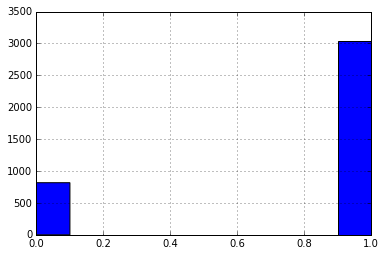

In [8]:
each=good_mmsi_train[57]
train_raw_message['Fishing'][(train_raw_message['mmsi'] == each)].hist()

![Guassian Mixture Model](https://github.com/cpueschel/FishingForFishermen/blob/master/Capture9.PNG?raw=true)

In [9]:
# for i in range(1,17):
#     print('\'STD_MD_'+str(i)+'\','),
# 'Time_Regime_1'
# 'Mean_Duration_1'
# 'STD_MD_1'
train_raw_message.columns

len(train_raw_message['nav_status'][train_raw_message['nav_status']==1])#.describe()
print(len(train_GMM_data),len(train_raw_message))

(112998, 142533)


In [ ]:

#GMM, purpose, join the distribution of speed and turning angle.
#Good resource: http://stackoverflow.com/questions/26019584/understanding-concept-of-gaussian-mixture-models?rq=1
#http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GMM.html#sklearn.mixture.GMM
K = 16             # number of mixtures/clusters
random_state = 170
train_kmeans = []
# for K in range(1,17):
score,aic,ii = 0,0,0

#Prep
cols = ['Mean_Lat','Mean_Long','Std_Lat','Std_Long','Sinuosity','Regime','Time_Regime_1', 'Time_Regime_2', 'Time_Regime_3', 'Time_Regime_4', 'Time_Regime_5', 'Time_Regime_6', 'Time_Regime_7', 'Time_Regime_8', 'Time_Regime_9', 'Time_Regime_10', 'Time_Regime_11', 'Time_Regime_12', 'Time_Regime_13', 'Time_Regime_14', 'Time_Regime_15', 'Time_Regime_16','Mean_Duration_1', 'Mean_Duration_2', 'Mean_Duration_3', 'Mean_Duration_4', 'Mean_Duration_5', 'Mean_Duration_6', 'Mean_Duration_7', 'Mean_Duration_8', 'Mean_Duration_9', 'Mean_Duration_10', 'Mean_Duration_11', 'Mean_Duration_12', 'Mean_Duration_13', 'Mean_Duration_14', 'Mean_Duration_15', 'Mean_Duration_16','STD_MD_1', 'STD_MD_2', 'STD_MD_3', 'STD_MD_4', 'STD_MD_5', 'STD_MD_6', 'STD_MD_7', 'STD_MD_8', 'STD_MD_9', 'STD_MD_10', 'STD_MD_11', 'STD_MD_12', 'STD_MD_13', 'STD_MD_14', 'STD_MD_15', 'STD_MD_16']
regime = ['Time_Regime_1', 'Time_Regime_2', 'Time_Regime_3', 'Time_Regime_4', 'Time_Regime_5', 'Time_Regime_6', 'Time_Regime_7', 'Time_Regime_8', 'Time_Regime_9', 'Time_Regime_10', 'Time_Regime_11', 'Time_Regime_12', 'Time_Regime_13', 'Time_Regime_14', 'Time_Regime_15', 'Time_Regime_16']
meand=['Mean_Duration_1', 'Mean_Duration_2', 'Mean_Duration_3', 'Mean_Duration_4', 'Mean_Duration_5', 'Mean_Duration_6', 'Mean_Duration_7', 'Mean_Duration_8', 'Mean_Duration_9', 'Mean_Duration_10', 'Mean_Duration_11', 'Mean_Duration_12', 'Mean_Duration_13', 'Mean_Duration_14', 'Mean_Duration_15', 'Mean_Duration_16']
std =['STD_MD_1', 'STD_MD_2', 'STD_MD_3', 'STD_MD_4', 'STD_MD_5', 'STD_MD_6', 'STD_MD_7', 'STD_MD_8', 'STD_MD_9', 'STD_MD_10', 'STD_MD_11', 'STD_MD_12', 'STD_MD_13', 'STD_MD_14', 'STD_MD_15', 'STD_MD_16']

def time_regime(x):
    x[regime[int(x['Regime'])-1]]=x['Regime']*x['TimeStep']
    return x

def mean_duration(x):
    for i in range(0,16):
        x[meand[i]]=x[regime[i]].mean()
    return x

def std_Mean_duration(x):
    for i in range(0,16):
        x[std[i]]=x[regime[i]].std()
    return x

for each in cols:
    test_raw_message[each],train_raw_message[each] = 0,0

    #Sinuosity
def calc_sinuosity(x):
    #SI = along stream/ between two points
    #Split into segments, if TimeStep is too Large (>3 hours)
    def haversines(x):#lon1, lat1, lon2, lat2):
        # decimal degrees to radian
#         print(x['x'].iloc[-1], x['y'].iloc[-1])
        lon1, lat1, lon2, lat2 = map(np.radians, [x['x'].iloc[0], x['y'].iloc[0], x['x'].iloc[-1], x['y'].iloc[-1]])
        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a)) 
        r = 6371 # Radius of earth in kilometers
        return c * r
    length = haversines(x)
    sum_dist = x['Haversine'].sum()
    x['Sinuosity'] = sum_dist/length
    return x

def Position_Information(x):
    vals= pd.DataFrame()
    vals = x[['x','y']].dropna()
    x['Mean_Lat'] = vals['x'].mean()
    x['Std_Lat'] = vals['x'].std()
    
    x['Mean_Long'] = vals['y'].mean()
    x['Std_Long'] = vals['y'].std()   
    return x

# TRAIN
train_raw_message['Velocity'] = train_raw_message['Velocity']*10
train_raw_message['Acceleration'] = train_raw_message['Acceleration']*10

test_raw_message['Velocity'] = test_raw_message['Velocity']*10
test_raw_message['Acceleration'] = test_raw_message['Acceleration']*10
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for ship in mmsi_train:
#     i+=1
    if (len(train_raw_message[train_raw_message['mmsi']==ship]) > K):
        ii+=1
        data = train_raw_message[['Velocity','TurningAngle']][train_raw_message['mmsi']==ship].fillna(value=0).values
        
        #Fit a GMM Model
        clf = mixture.GMM(n_components=K, covariance_type='tied')
        clf.fit(data)#,y=train_GMM_data[['Fishing']][train_GMM_data['mmsi']==ship].values)

#         display predicted scores by the model as a contour plot
        colors = ['r' if i==0 else 'g' for i in train_raw_message['Fishing'][train_raw_message['mmsi']==ship]]#train_GMM_data['Fishing'][train_GMM_data['mmsi']==ship]        ax = plt.gca()
        plt.scatter(data[:,0], data[:,1], c=colors, alpha=0.8)
        predicted=clf.predict(data)
        
        colors = ['r' if i==0 else 'g' for i in predicted]
        plt.scatter(data[:,0], data[:,1], c=colors, alpha=0.8)
        score += clf.score(data,y=train_raw_message[['Fishing']][train_raw_message['mmsi']==ship].values).mean()
        aic+=clf.aic(data)
        print(clf.converged_,clf.aic(data),clf.score(data,y=train_raw_message[['Fishing']][train_raw_message['mmsi']==ship].values).mean())
        
        train_raw_message['Regime'][train_raw_message['mmsi']==ship] = predicted
        train_raw_message[train_raw_message['mmsi']==ship]=train_raw_message[train_raw_message['mmsi']==ship].apply(time_regime, axis=1)
        
        train_raw_message[train_raw_message['mmsi']==ship] = mean_duration(train_raw_message[train_raw_message['mmsi']==ship])
        train_raw_message[train_raw_message['mmsi']==ship] = std_Mean_duration(train_raw_message[train_raw_message['mmsi']==ship])
        
        #Sinuosity
        train_raw_message[train_raw_message['mmsi']==ship]=calc_sinuosity(train_raw_message[train_raw_message['mmsi']==ship])
        train_raw_message[train_raw_message['mmsi']==ship]=Position_Information(train_raw_message[train_raw_message['mmsi']==ship])
        plt.show()
    else:
        train_raw_message[train_raw_message['mmsi']==ship]=train_raw_message[train_raw_message['mmsi']==ship].apply(time_regime, axis=1)
        train_raw_message[train_raw_message['mmsi']==ship] = mean_duration(train_raw_message[train_raw_message['mmsi']==ship])
        train_raw_message[train_raw_message['mmsi']==ship] = std_Mean_duration(train_raw_message[train_raw_message['mmsi']==ship])
        train_raw_message[train_raw_message['mmsi']==ship]=calc_sinuosity(train_raw_message[train_raw_message['mmsi']==ship])
        train_raw_message[train_raw_message['mmsi']==ship]=Position_Information(train_raw_message[train_raw_message['mmsi']==ship])
# print('K:',K,'Score:',score/ii,'AIC:',aic/ii)

#TEST
for ship in mmsi_test:
    break
    if (len(test_raw_message[test_raw_message['mmsi']==test_raw_message]) > K):
        data = test_raw_message[['Velocity','TurningAngle']][test_raw_message['mmsi']==ship].fillna(value=0).values
        
        #Fit a GMM Model
        clf = mixture.GMM(n_components=K, covariance_type='tied')
        clf.fit(data)

        predicted=clf.predict(data)
        test_raw_message['Regime'][test_raw_message['mmsi']==ship] = predicted
        test_raw_message[test_raw_message['mmsi']==ship]=test_raw_message[test_raw_message['mmsi']==ship].apply(time_regime, axis=1)
        
        test_raw_message[test_raw_message['mmsi']==ship] = mean_duration(test_raw_message[test_raw_message['mmsi']==ship])
        test_raw_message[test_raw_message['mmsi']==ship] = std_Mean_duration(test_raw_message[test_raw_message['mmsi']==ship])
        test_raw_message[test_raw_message['mmsi']==ship]=calc_sinuosity(test_raw_message[test_raw_message['mmsi']==ship])
        test_raw_message[test_raw_message['mmsi']==ship]=Position_Information(test_raw_message[test_raw_message['mmsi']==ship])
    else:
        test_raw_message[test_raw_message['mmsi']==ship]=test_raw_message[test_raw_message['mmsi']==ship].apply(time_regime, axis=1)
        test_raw_message[test_raw_message['mmsi']==ship] = mean_duration(test_raw_message[test_raw_message['mmsi']==ship])
        test_raw_message[test_raw_message['mmsi']==ship] = std_Mean_duration(test_raw_message[test_raw_message['mmsi']==ship])
        test_raw_message[test_raw_message['mmsi']==ship]=calc_sinuosity(test_raw_message[test_raw_message['mmsi']==ship])        
        test_raw_message[test_raw_message['mmsi']==ship]=Position_Information(test_raw_message[test_raw_message['mmsi']==ship])

#Choose 16 tied for now. 
# Also try K=3 and diag, and K=2 Full
#diag
# ('K:', 1, 'Score:', 2.8371909016198971, 'AIC:', -705.43350580700303)
# ('K:', 2, 'Score:', 3.1546573313254176, 'AIC:', -939.9815488149203)
# ('K:', 3, 'Score:', 3.1276335573481586, 'AIC:', -957.89544641646455) best
# ('K:', 4, 'Score:', 3.058191457738705, 'AIC:', -957.50173747675979)
# ('K:', 5, 'Score:', 3.0191085903250254, 'AIC:', -953.50607768443456)
# ('K:', 6, 'Score:', 2.9844417178660554, 'AIC:', -946.76300502875108)
# ('K:', 7, 'Score:', 2.9649568959036134, 'AIC:', -940.73787089998314)
# ('K:', 8, 'Score:', 2.9121302373663034, 'AIC:', -934.9104654529657)
# ('K:', 9, 'Score:', 2.8584745725770353, 'AIC:', -928.64779538735388)
# ('K:', 10, 'Score:', 2.812622906557579, 'AIC:', -922.81699720509573)
# ('K:', 11, 'Score:', 2.7641006858410408, 'AIC:', -916.95236653981601)
# ('K:', 12, 'Score:', 2.7443181792654827, 'AIC:', -911.11344980948161)
# ('K:', 13, 'Score:', 2.7192611108480871, 'AIC:', -905.20771603177786)
# ('K:', 14, 'Score:', 2.6996741523283512, 'AIC:', -899.52362343516495)
# ('K:', 15, 'Score:', 2.6643029425464904, 'AIC:', -893.7955449770692)
# ('K:', 16, 'Score:', 2.6244446385944937, 'AIC:', -888.16220400218901)

#full
# ('K:', 1, 'Score:', 2.8372221650302523, 'AIC:', -704.0719413824304)
# ('K:', 2, 'Score:', 3.1546557953556218, 'AIC:', -937.25621845611329)
# ('K:', 3, 'Score:', 3.127559197645668, 'AIC:', -953.84186167038115) best
# ('K:', 4, 'Score:', 3.0582485059589022, 'AIC:', -952.26719056799402)
# ('K:', 5, 'Score:', 3.0191320667681296, 'AIC:', -947.0483370549066)
# ('K:', 6, 'Score:', 2.9844761407165272, 'AIC:', -939.06887398782635)
# ('K:', 7, 'Score:', 2.9649668787858343, 'AIC:', -931.84029898836275)
# ('K:', 8, 'Score:', 2.9121705794746569, 'AIC:', -924.94226751778319)
# ('K:', 9, 'Score:', 2.8585156498393838, 'AIC:', -917.64816479864476)
# ('K:', 10, 'Score:', 2.8126532743814154, 'AIC:', -910.78974151699401)
# ('K:', 11, 'Score:', 2.7641539612532124, 'AIC:', -903.93389935938853)
# ('K:', 12, 'Score:', 2.7443541867617931, 'AIC:', -896.97240595034384)
# ('K:', 13, 'Score:', 2.7192676697690685, 'AIC:', -890.03452833617587)
# ('K:', 14, 'Score:', 2.6996913955387387, 'AIC:', -883.28712312458811)
# ('K:', 15, 'Score:', 2.6643098225071657, 'AIC:', -876.60426432315137)
# ('K:', 16, 'Score:', 2.6244718400426934, 'AIC:', -870.12265830909837)

#spherical
# ('K:', 1, 'Score:', 2.4304981314885064, 'AIC:', -377.60954956329698)
# ('K:', 2, 'Score:', 3.0516447617072289, 'AIC:', -860.17518428666392)
# ('K:', 3, 'Score:', 3.0676555044507352, 'AIC:', -908.06741656766599)
# ('K:', 4, 'Score:', 3.0183463568908269, 'AIC:', -920.49045918006004)
# ('K:', 5, 'Score:', 2.9900374232671552, 'AIC:', -925.4295532452702)
# ('K:', 6, 'Score:', 2.9612962382565087, 'AIC:', -926.64490500004604) best
# ('K:', 7, 'Score:', 2.9443971914913445, 'AIC:', -924.45315416083702)
# ('K:', 8, 'Score:', 2.8933065743924882, 'AIC:', -919.81237386788519)
# ('K:', 9, 'Score:', 2.8423936741907134, 'AIC:', -918.51531295409916)
# ('K:', 10, 'Score:', 2.797254499859708, 'AIC:', -914.55095417953805)
# ('K:', 11, 'Score:', 2.7487595695632692, 'AIC:', -910.52046289758846)
# ('K:', 12, 'Score:', 2.7298566765403174, 'AIC:', -907.2970440579727)
# ('K:', 13, 'Score:', 2.7055904341431964, 'AIC:', -903.09278147172074)
# ('K:', 14, 'Score:', 2.6868272580661325, 'AIC:', -899.31902046141863)
# ('K:', 15, 'Score:', 2.6517407694426729, 'AIC:', -895.05010274179688)
# ('K:', 16, 'Score:', 2.6124000251009138, 'AIC:', -890.68557576115757)

#tied
# ('K:', 1, 'Score:', 2.8372221650302523, 'AIC:', -704.0719413824304)
# ('K:', 2, 'Score:', 3.0531172572451855, 'AIC:', -820.47477110384511)
# ('K:', 3, 'Score:', 3.0402780586465021, 'AIC:', -864.18337186082067)
# ('K:', 4, 'Score:', 2.977567828395761, 'AIC:', -869.3809397574405)
# ('K:', 5, 'Score:', 2.9535721544418054, 'AIC:', -888.78402253899196)
# ('K:', 6, 'Score:', 2.9267999921360306, 'AIC:', -893.97960425501901)
# ('K:', 7, 'Score:', 2.9156745006195162, 'AIC:', -901.67242246282433)
# ('K:', 8, 'Score:', 2.8685678621424771, 'AIC:', -903.07545570213426)
# ('K:', 9, 'Score:', 2.8201526833186468, 'AIC:', -905.84715081373747)
# ('K:', 10, 'Score:', 2.7780209410499355, 'AIC:', -906.05560220388452)
# ('K:', 11, 'Score:', 2.7329249797376414, 'AIC:', -906.65559032860654)
# ('K:', 12, 'Score:', 2.7162374185254952, 'AIC:', -907.09773538621425)  best
# ('K:', 13, 'Score:', 2.6933555224538273, 'AIC:', -905.98655646153225)
# ('K:', 14, 'Score:', 2.6748086579041948, 'AIC:', -905.44259276222749)
# ('K:', 15, 'Score:', 2.641923568811686, 'AIC:', -904.83670002752831)
# ('K:', 16, 'Score:', 2.6030241746024938, 'AIC:', -902.90499799423719)


In [ ]:
train_raw_message.to_pickle('train_raw_message-3-K3-diag.pkl')
test_raw_message.to_pickle('test_raw_message-3-K3-diag.pkl')

# train_raw_message[train_raw_message['Fishing'] == 0.5] = np.nan
train_raw_message['nav_status'].describe() #may want to exapnd to more rows as well.

# MODEL

In [ ]:
# train_raw_message = pd.read_pickle('train_raw_message-3.pkl')
# test_raw_message = pd.read_pickle('test_raw_message-3.pkl')

train_raw_message=pd.read_pickle('train_raw_message-3-K3-diag.pkl')
test_raw_message=pd.read_pickle('test_raw_message-3-K3-diag.pkl')

In [ ]:
train_raw_message['Fishing'][train_raw_message['Fishing'] == np.nan].dropna(inplace=True)

In [ ]:
# train_raw_message.columns.values


In [ ]:
cols = ['TurningAngle','Velocity','Acceleration','Mean_Lat','Mean_Long','Std_Lat','Std_Long','Sinuosity','Regime','Time_Regime_1', 'Time_Regime_2', 'Time_Regime_3', 'Time_Regime_4', 'Time_Regime_5', 'Time_Regime_6', 'Time_Regime_7', 'Time_Regime_8', 'Time_Regime_9', 'Time_Regime_10', 'Time_Regime_11', 'Time_Regime_12', 'Time_Regime_13', 'Time_Regime_14', 'Time_Regime_15', 'Time_Regime_16','Mean_Duration_1', 'Mean_Duration_2', 'Mean_Duration_3', 'Mean_Duration_4', 'Mean_Duration_5', 'Mean_Duration_6', 'Mean_Duration_7', 'Mean_Duration_8', 'Mean_Duration_9', 'Mean_Duration_10', 'Mean_Duration_11', 'Mean_Duration_12', 'Mean_Duration_13', 'Mean_Duration_14', 'Mean_Duration_15', 'Mean_Duration_16','STD_MD_1', 'STD_MD_2', 'STD_MD_3', 'STD_MD_4', 'STD_MD_5', 'STD_MD_6', 'STD_MD_7', 'STD_MD_8', 'STD_MD_9', 'STD_MD_10', 'STD_MD_11', 'STD_MD_12', 'STD_MD_13', 'STD_MD_14', 'STD_MD_15', 'STD_MD_16']

In [ ]:
#Add in turning angle and veolcity?
train_data,test_data,train_data_y,test_index = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols.append('ShorelineDistance')
train_data_y['Fishing']=train_raw_message['Fishing'].fillna(value=0.0)
test_index = test_raw_message['index']
for each in cols:
    train_data[each] = train_raw_message[each].fillna(value=0)
    test_data[each] = test_raw_message[each].fillna(value=0)
    
    train_data[each][train_raw_message[each] == np.inf] = 0
    test_data[each][test_raw_message[each] == np.inf] = 0
    
# train_data

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_data, train_data_y)
print(rf.score(train_data, train_data_y))
#0.979

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
print("Train a XGBoost model")
params = {"objective": "binary:logistic",
          "eta": 0.3,
          "max_depth": 12,
          #"min_child_weight": 0.5,
          "subsample": 0.95,
          "colsample_bytree": 0.8,
          "eval_metric": "auc", #or error
          "gamma": 0.0,
          "max_delta_step": 1,
          "seed": 420
         }
num_round=1000
train_data['Fishing']=train_data_y['Fishing']
train_data=train_data.reindex(np.random.permutation(train_data.index))
del train_data_y
train_data_y = pd.DataFrame()
train_data_y = train_data['Fishing']
train_data.drop('Fishing',axis=1,inplace=True)

dtrain = xgb.DMatrix(data=train_data,label=train_data_y, missing=np.nan)
gbm = xgb.train(params,dtrain, num_round)


In [ ]:
#Cross Validation
# cv_res = xgb.cv(params, dtrain, num_round, nfold=5,metrics={'error'})

#columns
features_train = list(train_data.columns)


In [ ]:
import operator
def ceate_feature_map(features):
    outfile = open('XGBoost-Method.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
features = features_train
ceate_feature_map(features)    

importance = gbm.get_fscore(fmap='XGBoost-Method.fmap')

importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure(figsize=(20,10))
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(20, 30))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('XGBoost-Method.png')

In [ ]:
from sklearn import cross_validation, metrics
def binary(x):
    if x > 0.5:
        return 1
    else:
        return 0
asdf = gbm.predict(xgb.DMatrix(data=train_data[120000:], missing=np.nan))
vecfunc = np.vectorize(binary)
result = vecfunc(asdf)


print(metrics.accuracy_score(vecfunc(train_data_y[120000:]), result))

#0.97814541194
# params = {"objective": "binary:logistic",
#           "eta": 0.3,
#           "max_depth": 12,
#           #"min_child_weight": 0.5,
#           "subsample": 0.95,
#           "colsample_bytree": 0.8,
#           "eval_metric": "error", #or error
#           "gamma": 0.0,
#           "max_delta_step": 1,
#           "seed": 420
#          }
# num_round=1000

#K=3 diag
#0.83539 no shuffle
#0.9594 with shuffle cols = ['TurningAngle','Velocity','Acceleration','Mean_Lat','Mean_Long','Std_Lat','Std_Long','Sinuosity','Regime','Time_Regime_1', 'Time_Regime_2', 'Time_Regime_3', 'Time_Regime_4', 'Time_Regime_5', 'Time_Regime_6', 'Time_Regime_7', 'Time_Regime_8', 'Time_Regime_9', 'Time_Regime_10', 'Time_Regime_11', 'Time_Regime_12', 'Time_Regime_13', 'Time_Regime_14', 'Time_Regime_15', 'Time_Regime_16','Mean_Duration_1', 'Mean_Duration_2', 'Mean_Duration_3', 'Mean_Duration_4', 'Mean_Duration_5', 'Mean_Duration_6', 'Mean_Duration_7', 'Mean_Duration_8', 'Mean_Duration_9', 'Mean_Duration_10', 'Mean_Duration_11', 'Mean_Duration_12', 'Mean_Duration_13', 'Mean_Duration_14', 'Mean_Duration_15', 'Mean_Duration_16','STD_MD_1', 'STD_MD_2', 'STD_MD_3', 'STD_MD_4', 'STD_MD_5', 'STD_MD_6', 'STD_MD_7', 'STD_MD_8', 'STD_MD_9', 'STD_MD_10', 'STD_MD_11', 'STD_MD_12', 'STD_MD_13', 'STD_MD_14', 'STD_MD_15', 'STD_MD_16']
#0.956552611725 without 'TimeStep'
# 0.958505303333 without 'status'
# without timestep, status, and 'Acceleration'

#K=16 tied
# 0.958594062042 error
# 0.96014 trained with auc

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(train_data_y[120000:], asdf, pos_label=1)
auc = metrics.auc(fpr,tpr)

In [ ]:
auc, fpr, tpr

In [ ]:
from ggplot import *

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

## Export Results

In [ ]:
#Save-the-results
#Each line should contain only one human readable number between 0 and 1 indicating the fishing confidence for the corresponding message.
#It would be a good idea to test between [0,1] and the post processed 0 or 1
dftest=xgb.DMatrix(data=test_data, missing=np.nan)
results=gbm.predict(dftest)

#Sort to prior
results_sorted = pd.DataFrame()
results_sorted['true_index'] = test_raw_message['index']
results_sorted['results'] = results
results_sorted.sort('true_index',inplace=True)

#Save in proper format!
output = pd.DataFrame({'results': results_sorted['results']})
output.to_csv('FR-K3-tied-train-percent-0.958372165269.csv',index=False, header=False)